In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
historical_bonds = pd.read_csv('historical_bonds.csv')
simulation_bonds = pd.read_csv('simulation_bonds.csv')



historical_bonds

historical_bonds["credit_region"] = historical_bonds["credit_rating"] + " - " + historical_bonds["region"]
training_data = historical_bonds[["debt_to_equity", "energy_capacity","esg_rating" , "credit_region","cash_flow_1", "cash_flow_2", "cash_flow_3"]]
training_data['esg_rating_squared'] = training_data['esg_rating'] ** 2
training_data





/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_9225/510144110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['esg_rating_squared'] = training_data['esg_rating'] ** 2


debt_to_equity  energy_capacity  esg_rating        credit_region  \
0         -0.364063         3.277333   57.459739  AAA - North America   
1         -0.098335        17.823871   22.871580   AA - North America   
2          0.938648        25.360441   42.125540    B - North America   
3          2.332380        38.748027   50.833794           A - Europe   
4          1.367557        14.223886   21.952435           AAA - Asia   
..              ...              ...         ...                  ...   
995        0.840647        17.527648   26.744813         CCC - Europe   
996        0.632371        18.241791   94.688375         AAA - Europe   
997        1.086183        23.294626   25.456681   AA - North America   
998       -0.197552        77.065382   15.642536           AAA - Asia   
999        1.750573        35.594508   81.144317  BBB - North America   

      cash_flow_1   cash_flow_2   cash_flow_3  esg_rating_squared  
0    16073.383072  18258.536478  19058.838868         3301.621581  
1    24916.360679  24239.463191  24424.154724          523.109178  
2    39714.279589  35392.069106      0.000000         1774.561138  
3    38811.989952  51241.902369  62943.802597         2584.074647  
4    24840.652670  29598.165602  35355.805194          481.909411  
..            ...           ...           ...                 ...  
995  50876.513554  53549.216004      0.000000          715.284998  
996  25788.520417  27706.100521  27425.785246         8965.888400  
997  29631.868285  28941.561132  28827.280542          648.042587  
998  38988.652285  44413.990671  49565.597051          244.688923  
999  42696.698511  51474.697852  59105.850259         6584.400214  

[1000 rows x 8 columns]

### CASH FLOW 1 model

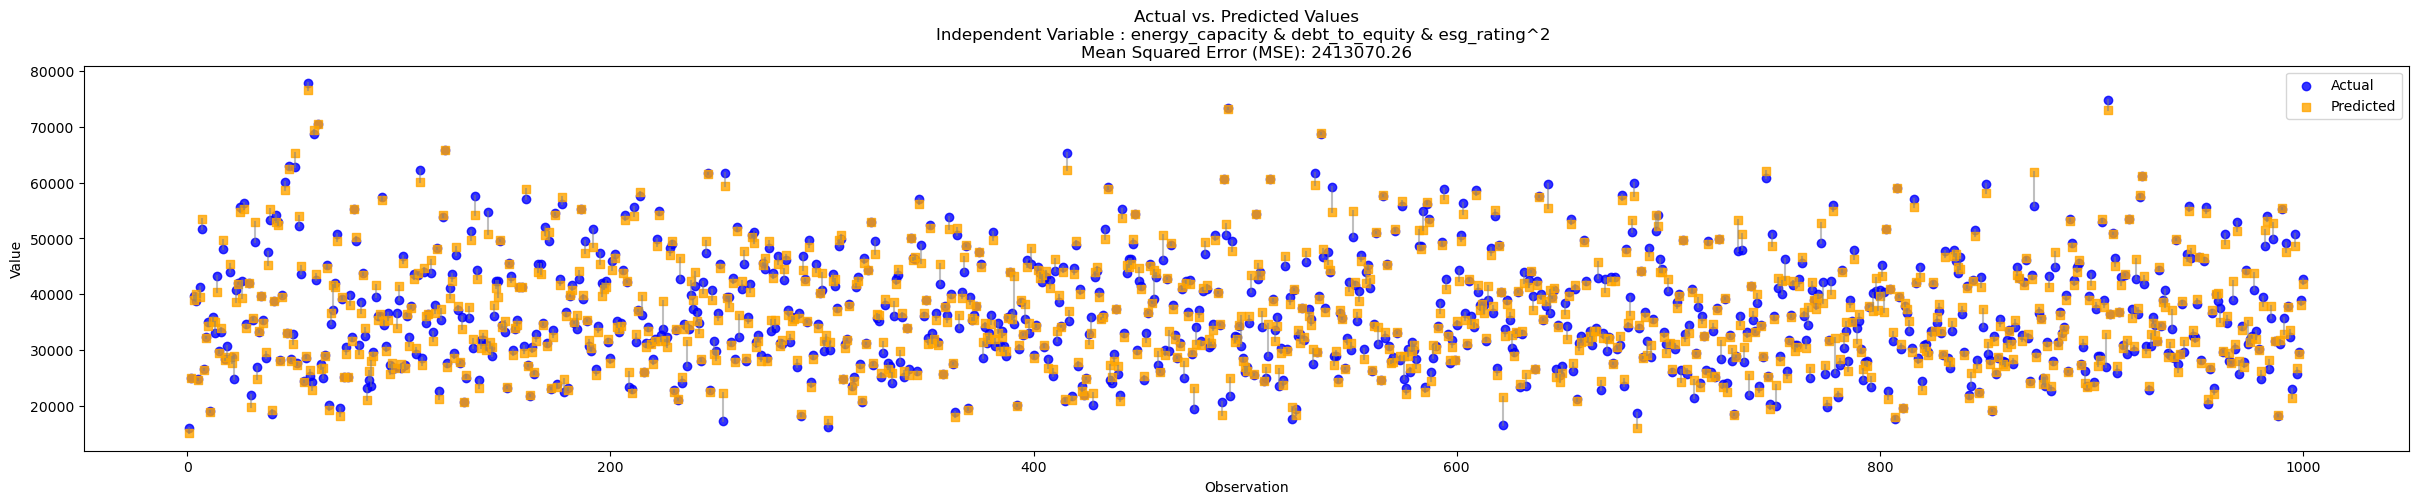

2413070.2607992063

In [3]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    
    X = group[["debt_to_equity", "energy_capacity", "esg_rating", "esg_rating_squared"]].values 
    y = group['cash_flow_1'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'debt_to_equity_coefficient': model.coef_[0],
        'energy_capacity_coefficient': model.coef_[1],
        'esg_rating_coefficient': model.coef_[2],
        'esg_rating_squared_coefficient': model.coef_[3],
        'intercept': model.intercept_,
        'cash_flow_model': 0  # Placeholder
    })

cash_flow_models = pd.DataFrame(regression_results)





#Plotting results and computing MSE

merged_df_2 = training_data.merge(cash_flow_models, on='credit_region', how='left')
merged_df_2['cash_flow_1_prediction'] = merged_df_2['energy_capacity'] * merged_df_2['energy_capacity_coefficient'] + merged_df_2['debt_to_equity'] * merged_df_2['debt_to_equity_coefficient']+ merged_df_2['esg_rating_squared'] * merged_df_2['esg_rating_squared_coefficient']+ merged_df_2['esg_rating'] * merged_df_2['esg_rating_coefficient'] +merged_df_2['intercept']

num_observations = 1000
actual = merged_df_2['cash_flow_1']
predicted = merged_df_2['cash_flow_1_prediction']  




mse = np.mean((actual - predicted) ** 2)
x = np.arange(1, num_observations + 1)
plt.figure(figsize=(30, 5))

for i in range(num_observations):
    plt.plot([x[i], x[i]], [actual[i], predicted[i]], color='gray', linestyle='-', alpha=0.5)


plt.scatter(x, actual, color='blue', marker='o', label="Actual", alpha=0.8)
plt.scatter(x, predicted, color='orange', marker='s', label="Predicted", alpha=0.8)

plt.xlabel("Observation")
plt.ylabel("Value")


plt.legend()
plt.title(f"Actual vs. Predicted Values\nIndependent Variable : energy_capacity & debt_to_equity & esg_rating^2 \nMean Squared Error (MSE): {mse:.2f}")
plt.show()
mse




In [4]:
np.sqrt(2413070)

1553.4059353562416

### CASH FLOW 2 models

In [8]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[["debt_to_equity", "energy_capacity", "esg_rating", 'cash_flow_1',"esg_rating_squared"]].values 
    y = group['cash_flow_2'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'debt_to_equity_coefficient': model.coef_[0],
        'energy_capacity_coefficient': model.coef_[1],
        'esg_rating_coefficient': model.coef_[2],
        'cash_flow_1_coefficient': model.coef_[3],
        'esg_rating_squared_coefficient': model.coef_[4],
        'intercept': model.intercept_,
        'cash_flow_model': 1
    })

cash_flow_2_models = pd.DataFrame(regression_results)






### CASH FLOW 3 models

In [6]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    
    X = group[["debt_to_equity", "energy_capacity", "esg_rating", 'cash_flow_1','cash_flow_2', "esg_rating_squared"]].values 
    y = group['cash_flow_3'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'debt_to_equity_coefficient': model.coef_[0],
        'energy_capacity_coefficient': model.coef_[1],
        'esg_rating_coefficient': model.coef_[2],
        'cash_flow_1_coefficient': model.coef_[3],
        'cash_flow_2_coefficient': model.coef_[4],
        'esg_rating_squared_coefficient': model.coef_[5],
        'intercept': model.intercept_,
        'cash_flow_model': 2
    })

cash_flow_3_models = pd.DataFrame(regression_results)
cash_flow_3_models



credit_region  debt_to_equity_coefficient  \
0              A - Asia                 1653.995451   
1            A - Europe                 1277.710881   
2     A - North America                  680.426729   
3     A - South America                    0.000103   
4             AA - Asia                  132.444964   
5           AA - Europe                  553.052504   
6    AA - North America                  118.132357   
7    AA - South America                -2322.498944   
8            AAA - Asia                 1056.864354   
9          AAA - Europe                  836.758580   
10  AAA - North America                  217.768306   
11  AAA - South America                 2756.105483   
12             B - Asia                    0.000000   
13           B - Europe                    0.000000   
14    B - North America                    0.000000   
15    B - South America                    0.000000   
16            BB - Asia                 1352.152170   
17          BB - Europe                 -482.982029   
18   BB - North America                  765.708921   
19   BB - South America                    0.000769   
20           BBB - Asia                  708.527609   
21         BBB - Europe                 1348.204154   
22  BBB - North America                  861.776532   
23  BBB - South America                   15.856924   
24           CCC - Asia                    0.000000   
25         CCC - Europe                    0.000000   
26  CCC - North America                    0.000000   
27  CCC - South America                    0.000000   

    energy_capacity_coefficient  esg_rating_coefficient  \
0                    -34.274383               94.379072   
1                     41.231267              -26.761685   
2                     79.236366              -77.195163   
3                      0.002450                0.002240   
4                     -6.368293              -27.032804   
5                     19.625548               -7.213996   
6                    -10.701324               54.238465   
7                    -70.401027              101.622636   
8                     25.429440              -33.723862   
9                     50.030915              -41.213444   
10                     8.518271               -3.716242   
11                    52.826321              -71.134149   
12                     0.000000                0.000000   
13                     0.000000                0.000000   
14                     0.000000                0.000000   
15                     0.000000                0.000000   
16                    11.657052             -224.981717   
17                   -34.835497              -15.334687   
18                    47.530674              -67.237790   
19                    -0.017354                0.003684   
20                    28.744341              -45.725307   
21                    80.279285              -73.533574   
22                    33.939417                2.588336   
23                   138.656927             -318.059869   
24                     0.000000                0.000000   
25                     0.000000                0.000000   
26                     0.000000                0.000000   
27                     0.000000                0.000000   

    cash_flow_1_coefficient  cash_flow_2_coefficient  \
0                 -1.047204                 2.134909   
1                 -0.942644                 1.866047   
2                 -1.122353                 1.963469   
3                  0.300751                 1.554308   
4                 -0.916967                 1.854905   
5                 -0.942097                 1.888950   
6                 -0.856961                 1.907111   
7                 -0.650309                 1.996380   
8                 -0.920795                 1.840509   
9                 -0.939010                 1.828769   
10                -1.039153                 1.996300   
11                -0.750149   

In [7]:
models = pd.concat([cash_flow_1_models, cash_flow_2_models, cash_flow_3_models], axis=0, ignore_index=True)
models.head(50)

NameError: name 'cash_flow_1_models' is not defined

### Exporting the models 

In [ ]:
models.to_csv('model_parameters.csv', index=False)


In [ ]:
historical_bonds